In [1]:
import sys;
import notebookutil;
sys.meta_path.append(notebookutil.NotebookFinder());
from bento_data import print_uniques;
from bento_data import load_data;

import math;
import pandas as pd;
import numpy as np;
from scipy.optimize import curve_fit;
import matplotlib.pyplot as plot;
from IPython.display import display;
%matplotlib inline

### データファイル読み込み

In [2]:
df_train, df_test = load_data(verbose=True);

train length: 207
test length: 40


### 属性の確認

In [3]:
display(df_train);
print_uniques(df_train, "payday");
print_uniques(df_train, "week");
print_uniques(df_train, "weather");
print_uniques(df_train, "remarks");
print_uniques(df_train, "event");
print_uniques(df_train, "name");

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


======= payday(207) =======
count    10.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: payday, dtype: float64
------
nan
1.0
======= week(207) =======
count     207
unique      5
top         水
freq       43
Name: week, dtype: object
------
月
火
水
木
金
======= weather(207) =======
count     207
unique      7
top         曇
freq       53
Name: weather, dtype: object
------
快晴
曇
晴れ
薄曇
雨
雪
雷電
======= remarks(207) =======
count           21
unique           6
top       お楽しみメニュー
freq            12
Name: remarks, dtype: object
------
nan
鶏のレモンペッパー焼（50食）、カレー（42食）
酢豚（28食）、カレー（85食）
お楽しみメニュー
料理長のこだわりメニュー
手作りの味
スペシャルメニュー（800円）
======= event(207) =======
count       14
unique       2
top       ママの会
freq         9
Name: event, dtype: object
------
nan
ママの会
キャリアアップ支援セミナー
======= name(207) =======
count       207
unique      156
top       メンチカツ
freq          6
Name: name, dtype: object
------
厚切りイカフライ
手作りヒレカツ
白身魚唐揚げ野菜あん
若鶏ピリ辛焼
ビッグメンチカツ
鶏の唐揚
豚のスタミ

### 販売数傾向、スパイク観察

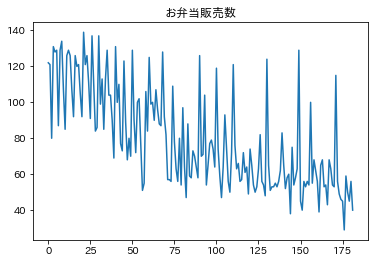

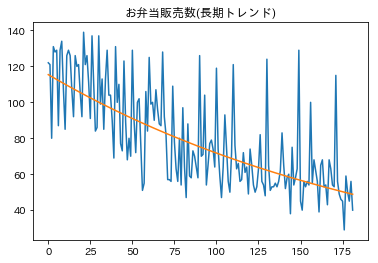

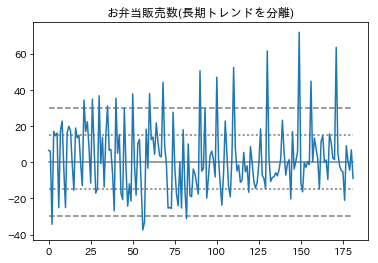

上スパイク(+30個): 15件


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
46,2014-02-03,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9
51,2014-02-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
55,2014-02-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6
60,2014-02-24,129,月,1,ポークハヤシ,408.0,NaN,NaN,NaN,曇,--,6.6
65,2014-03-03,131,月,0,ハンバーグカレーソース,407.0,NaN,NaN,NaN,曇,--,7.8
75,2014-03-17,129,月,0,鶏の唐揚げおろしソース,382.0,NaN,NaN,NaN,快晴,--,14.0
85,2014-04-01,125,火,1,メンチカツ,377.0,NaN,NaN,NaN,薄曇,--,16.1
93,2014-04-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,16.5
115,2014-05-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8
125,2014-05-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,薄曇,--,26.9


上スパイク(+15個): 23件


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
28,2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
30,2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,NaN,曇,--,10.9
32,2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8
33,2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,NaN,NaN,曇,--,2.9
36,2014-01-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,NaN,晴れ,--,6.5
37,2014-01-21,129,火,1,サバ焼味噌掛け,447.0,NaN,NaN,NaN,快晴,--,10.4
38,2014-01-22,126,水,1,手作りひれかつとカレー,426.0,NaN,NaN,NaN,快晴,--,7.4
41,2014-01-27,126,月,1,チンジャオロース,415.0,NaN,NaN,NaN,快晴,--,5.1
43,2014-01-29,121,水,1,チーズ入りメンチカツ,450.0,NaN,NaN,NaN,快晴,--,10.3
47,2014-02-04,121,火,1,さわら焼味噌掛け,430.0,NaN,NaN,NaN,雨,0,3.8


下スパイク(-30個): 4件


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3
81,2014-03-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7
82,2014-03-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4
107,2014-05-02,47,金,0,鶏の天ぷら,420.0,NaN,NaN,NaN,晴れ,--,23.3


下スパイク(-15個): 26件


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
31,2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
35,2014-01-17,85,金,1,回鍋肉,430.0,NaN,ママの会,NaN,快晴,--,7.8
40,2014-01-24,92,金,1,鶏のレモンペッパー焼orカレー,418.0,鶏のレモンペッパー焼（50食）、カレー（42食）,NaN,NaN,快晴,--,10.1
53,2014-02-13,84,木,0,回鍋肉,438.0,NaN,NaN,NaN,曇,--,6.4
64,2014-02-28,69,金,0,手作りひれかつ,428.0,NaN,NaN,NaN,晴れ,--,17.7
68,2014-03-06,77,木,0,チキンクリームシチュー,409.0,NaN,NaN,NaN,快晴,--,6.7
69,2014-03-07,73,金,1,ボローニャ風カツ,396.0,NaN,NaN,NaN,快晴,--,7.0
72,2014-03-12,68,水,0,ビーフカレー,370.0,NaN,NaN,NaN,快晴,--,14.8
74,2014-03-14,70,金,1,カレイ野菜あんかけ,360.0,NaN,ママの会,NaN,曇,--,11.5
77,2014-03-19,72,水,1,越冬キャベツのメンチカツ,392.0,NaN,NaN,NaN,曇,--,12.6


定常: 114件


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
25,2013-12-24,122,火,0,さっくりメンチカツ,NaN,NaN,NaN,NaN,快晴,--,11.5
26,2013-12-25,121,水,1,手ごね風ハンバーグ,NaN,NaN,NaN,NaN,快晴,--,8.0
29,2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
34,2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,NaN,NaN,快晴,--,7.0
39,2014-01-23,107,木,0,酢豚,400.0,NaN,NaN,NaN,快晴,--,8.5
42,2014-01-28,120,火,0,海老フライタルタル,445.0,NaN,NaN,NaN,快晴,--,12.6
44,2014-01-30,105,木,1,鶏の唐揚げ,448.0,NaN,NaN,NaN,曇,--,15.3
45,2014-01-31,92,金,1,メダイ照り焼,460.0,NaN,NaN,NaN,快晴,--,14.1
49,2014-02-06,111,木,1,手作りロースカツ,435.0,NaN,NaN,NaN,曇,--,4.2
50,2014-02-07,91,金,1,ホタテクリ―ムシチュー,425.0,NaN,NaN,NaN,晴れ,--,5.5


In [4]:
data_offset = 25;
x = np.arange(len(df_train) - data_offset);
y = df_train[data_offset:].y.as_matrix();

# 販売数の時系列表示
plot.title(u"お弁当販売数");
plot.plot(x, y);
plot.show();

# 長期的傾向の表示
# 指数関数近似： y = a * exp(b * x)
# log(y) = log( a * exp( b * x ) )
# log(y) = ( log(a) + b * x )
b, log_a = np.polyfit(x, np.log(y), 1);
apx = np.exp(log_a) * np.exp(b * x);
# 直線近似: y = a * x + b
#a, b = np.polyfit(x, y, 1);
#apx = x * a + b;
sub = y - apx;
plot.title(u"お弁当販売数(長期トレンド)");
plot.plot(x, y);
plot.plot(x, apx);
plot.show();

# 長期的傾向を引いた変動
spike_offset = 30;
plot.title(u"お弁当販売数(長期トレンドを分離)");
plot.plot(x, np.zeros_like(x), color="gray");
plot.plot(x, np.zeros_like(x) + spike_offset, linestyle="dashed", color="gray");
plot.plot(x, np.zeros_like(x) + spike_offset/2, linestyle="dotted", color="gray");
plot.plot(x, np.zeros_like(x) - spike_offset/2, linestyle="dotted", color="gray");
plot.plot(x, np.zeros_like(x) - spike_offset, linestyle="dashed", color="gray");
plot.plot(x, sub);
plot.show();

'''
# 季節変動を分離
# sin関数近似： y = a * sin(x) + b
a, b = np.polyfit(np.sin(0.2 * x), sub, 1);
#apx = 15 * np.sin(0.04*x + 0.6) + 0;
apx = 15 * np.sin(0.028*x + 2.8) + 0;
plot.title(u"お弁当販売数(長期傾向を分離した周期変動)");
plot.plot(x, sub);
plot.plot(x, apx);
#plot.plot(x, sub-apx);
plot.show();
'''

# 上ブレ/下ブレしているデータ
df_spike_up_large = df_train.iloc[data_offset:, :].ix[sub >= spike_offset, :];
df_spike_up_small = df_train.iloc[data_offset:, :].ix[(sub >= spike_offset/2) & (sub < spike_offset), :];
df_spike_down_small = df_train.iloc[data_offset:, :].ix[(sub <= -spike_offset/2) & (sub > -spike_offset), :];
df_spike_down_large = df_train.iloc[data_offset:, :].ix[sub <= -spike_offset, :];
df_nospike = df_train.iloc[data_offset:, :].ix[(sub > -spike_offset/2) & (sub < spike_offset/2), :];

print("上スパイク(+{}個): {}件".format(spike_offset, len(df_spike_up_large)));
display(df_spike_up_large);
print("上スパイク(+{}個): {}件".format(spike_offset/2, len(df_spike_up_small)));
display(df_spike_up_small);
print("下スパイク(-{}個): {}件".format(spike_offset, len(df_spike_down_large)));
display(df_spike_down_large);
print("下スパイク(-{}個): {}件".format(spike_offset/2, len(df_spike_down_small)));
display(df_spike_down_small);
print("定常: {}件".format(len(df_nospike)));
display(df_nospike);

### 予測対象

In [5]:
display(df_test);

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-01,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-02,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-03,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-06,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-07,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1
5,2014-10-08,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3
6,2014-10-09,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1
8,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8
9,2014-10-15,水,1,ミックスグリル,450.0,料理長のこだわりメニュー,NaN,NaN,雨,1.5,15.6


0.865753424658


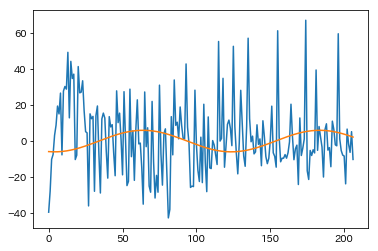

{'test': array([ 49.69601766,  49.15503058,  48.61073343,  48.06396391,
        47.51556988,  46.96640701,  46.41733643,  45.86922228,
        45.32292934,  44.77932064,  44.23925501,  43.70358477,
        43.17315325,  42.64879257,  42.13132123,  41.62154187,
        41.12023904,  40.62817701,  40.14609765,  39.67471836,
        39.21473007,  38.76679534,  38.33154648,  37.90958379,
        37.50147394,  37.10774831,  36.72890159,  36.36539033,
        36.01763169,  35.6860023 ,  35.37083715,  35.0724287 ,
        34.79102603,  34.52683415,  34.28001341,  34.05067905,
        33.83890086,  33.64470299,  33.46806385,  33.30891615]), 'train': array([ 129.62702699,  128.88787856,  128.16850961,  127.4690189 ,
        126.78945978,  126.12983999,  125.49012161,  124.87022108,
        124.27000943,  123.68931255,  123.12791164,  122.58554378,
        122.0619026 ,  121.55663907,  121.06936243,  120.59964121,
        120.14700442,  119.71094273,  119.29090992,  118.88632427,
        118.496

In [6]:
from bento_data import prepare_dataset;

start = pd.to_datetime(df_train.datetime[0]);
end = pd.to_datetime(df_train.datetime[len(df_train)-1]);
date_rate = (end - start).days / (len(df_train) + 0.0);
print date_rate * len(df_train) / 365
n_chops = 0;
offset_funcs = [
    lambda x: 6 * np.sin((4 * np.pi * date_rate / 365) * x + 4.50) + 0, # annual
];
X, y, target, y_offset = prepare_dataset(drop_columns=[], n_chops=n_chops, menus=True, baselines={"stability": "exp", "any": offset_funcs});
x = np.arange(len(X));
plot.plot(x, y);
for offset_func in offset_funcs:
    plot.plot(x, offset_func(x));
plot.show();
print y_offset